In [6]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()


In [7]:
stock_symbol = "AAPL"
start_date = "2010-01-01"
end_date = "2022-01-01"
stock_data = pdr.get_data_yahoo(stock_symbol, start=start_date, end=end_date)


[*********************100%%**********************]  1 of 1 completed


In [8]:


scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(stock_data['Close'].values.reshape(-1, 1))


prediction_days = 60
x_train, y_train = [], []
for i in range(prediction_days, len(scaled_data)):
    x_train.append(scaled_data[i - prediction_days:i, 0])
    y_train.append(scaled_data[i, 0])
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))



In [9]:

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))


model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=25, batch_size=32)



Epoch 1/25
93/93 [==============================] - 12s 70ms/step - loss: 0.0045
Epoch 2/25
93/93 [==============================] - 6s 64ms/step - loss: 0.0013
Epoch 3/25
93/93 [==============================] - 7s 76ms/step - loss: 0.0013
Epoch 4/25
93/93 [==============================] - 7s 71ms/step - loss: 0.0011
Epoch 5/25
93/93 [==============================] - 7s 72ms/step - loss: 0.0011
Epoch 6/25
93/93 [==============================] - 7s 77ms/step - loss: 0.0012
Epoch 7/25
93/93 [==============================] - 7s 70ms/step - loss: 0.0011
Epoch 8/25
93/93 [==============================] - 8s 82ms/step - loss: 8.3520e-04
Epoch 9/25
93/93 [==============================] - 6s 68ms/step - loss: 9.0798e-04
Epoch 10/25
93/93 [==============================] - 7s 74ms/step - loss: 7.9656e-04
Epoch 11/25
93/93 [==============================] - 6s 68ms/step - loss: 9.9096e-04
Epoch 12/25
93/93 [==============================] - 6s 66ms/step - loss: 8.4561e-04
Epoch 13/25
93/9

In [10]:

test_start_date = "2022-01-01"
test_end_date = "2022-03-01"
test_data = pdr.get_data_yahoo(stock_symbol, start=test_start_date, end=test_end_date)
actual_prices = test_data['Close'].values

total_data = pd.concat((stock_data['Close'], test_data['Close']), axis=0)
model_inputs = total_data[len(total_data) - len(test_data) - prediction_days:].values
model_inputs = model_inputs.reshape(-1, 1)
model_inputs = scaler.transform(model_inputs)

x_test = []
for i in range(prediction_days, len(model_inputs)):
    x_test.append(model_inputs[i - prediction_days:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

predicted_prices = model.predict(x_test)
predicted_prices = scaler.inverse_transform(predicted_prices)



[*********************100%%**********************]  1 of 1 completed


2/2 [==============================] - 1s 16ms/step


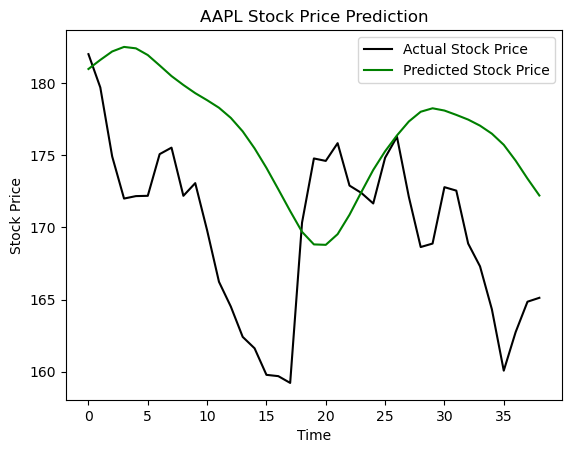

In [11]:

plt.plot(actual_prices, color='black', label='Actual Stock Price')
plt.plot(predicted_prices, color='green', label='Predicted Stock Price')
plt.title(f"{stock_symbol} Stock Price Prediction")
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()
